# Way Home

In [102]:
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Set Simulation Params and Create Grid

In [119]:
drunk_velocity = 1 # in m/s 
#car_velocitiy = 10 
car_intensitiy = 0.05 # probability that a car occurs on a lane 

# how many lanes has one direction? one lane is 1m
street_lanes = 2 
street_length = 50


In [139]:
def create_grid(street_lanes=2, street_length=50):
    street_width = 3 + 2*street_lanes 
    grid = np.zeros((street_width, street_length))

    # compute sideways - start and end row as well as between the directions
    sideways = [0, street_lanes+1, grid.shape[0]-1]
    for i in sideways:
        grid[i,] = 0.25


    # randomly place the person
    grid[0, random.randint(0, street_length)] = 1.0
    
    return grid, sideways

Text(0.5, 1.0, 'Initial Grid')

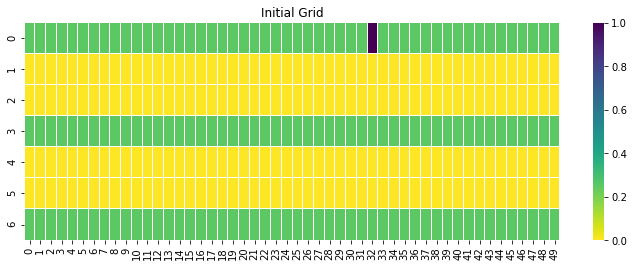

In [140]:
grid, sideways = create_grid(street_lanes, street_length)

plt.figure(figsize=(12,4))
sns.heatmap(grid, cmap="viridis_r", linewidths=.005, vmin=0, vmax=1)
plt.title("Initial Grid")

## _A_
- t=1=constant
- change in direction is always $\frac{1}{4}$ probability left, $\frac{1}{4}$ right, $\frac{1}{2}$ forward

### static cars
Cars do appear on a lane or not - velocity is not considered. If the drunk is on a lane where a car appears, he's dead.

In [301]:
def model_step(grid, sideways=[0,3,6],
               t_constant=True,
               drunk_velocity=1, car_intensity=0.05, car_velocity=None,
               plot_progress=True):
    
    # safe grid layout for quick resets
    grid_layout = grid[:,0]
    
    # get persons coordinates
    y,x = np.unravel_index(grid.argmax(), grid.shape)
    
    hit = False
    finished = False
    
    # roll persons movement
    direction = (0, 0)
    p_dir = np.random.uniform(0,1,1)
    if p_dir < 0.25:
        direction = (0, -drunk_velocity)
    elif 0.25 <= p_dir < 0.5:
        direction = (0, drunk_velocity)
    elif 0.5 <= p_dir :
        direction = (1, drunk_velocity)
    
    # make cars appear with probability car_intensity
    for lane in range(0, grid.shape[0]): 
        if lane not in sideways: 
            car_on_lane = (np.random.uniform(0,1,1) < car_intensity).item()
            if car_on_lane:
                grid[lane,] = 0.6
            if not car_on_lane:
                grid[lane,] = 0
    
    #print(y+direction[0], x+direction[1],grid[y+direction[0], x+direction[1]])
    grid[y+direction[0], x+direction[1]] = 1.0 
    grid[y, x] = grid_layout[y] # reset old coordinate
    
    # compute hit
    #vals, cnts = np.unique(grid[1,:], return_counts=True)
    #print(vals[cnts.argmax()])
    if grid[y+direction[0], x+direction[1]+1] == 0.6: 
        hit = True
    
    # if the last row is reached, the drunk survived
    if y+direction[0] == grid.shape[0]-1: 
        finished = True
    
    if plot_progress:
        plt.figure(figsize=(12,4))
        sns.heatmap(grid, cmap="viridis_r", linewidths=.05, vmin=0, vmax=1)
        plt.title("Grid Steps")
    
    return grid, hit, finished

Text(0.5, 1.0, 'Initial Grid')

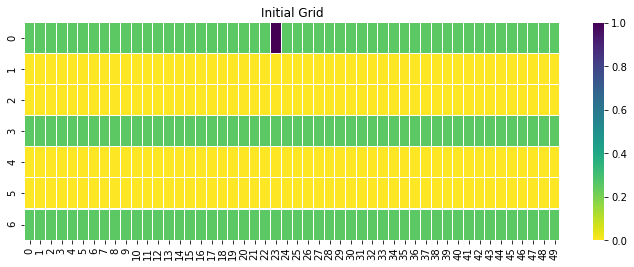

In [346]:
grid, sideways = create_grid(street_lanes, street_length)
plt.figure(figsize=(12,4))
p = sns.heatmap(grid, cmap="viridis_r", linewidths=.05, vmin=0, vmax=1)
plt.title("Initial Grid")

In [315]:
plt.show(p)

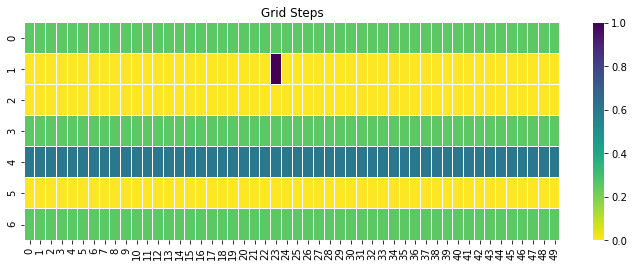

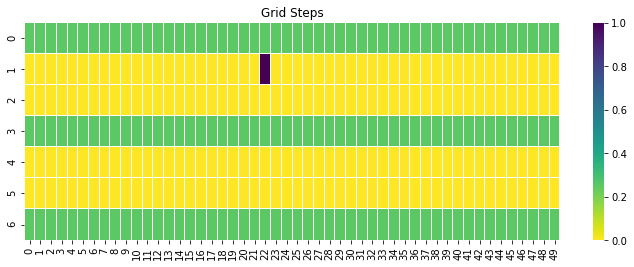

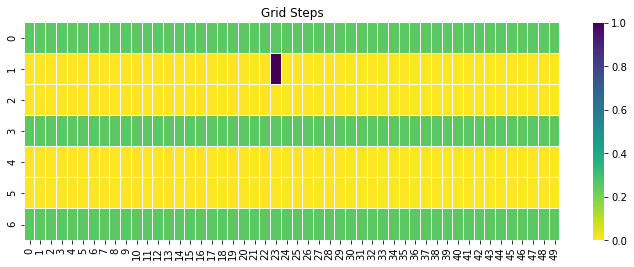

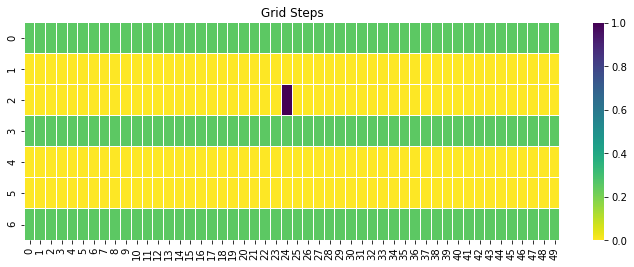

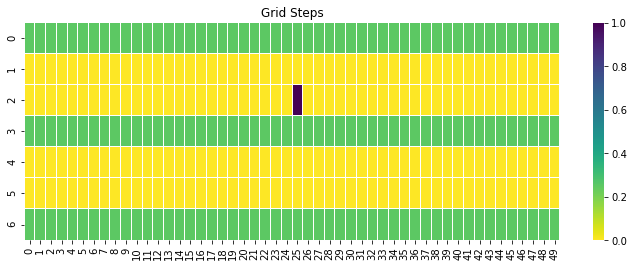

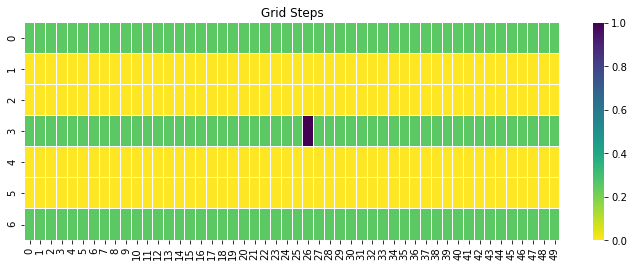

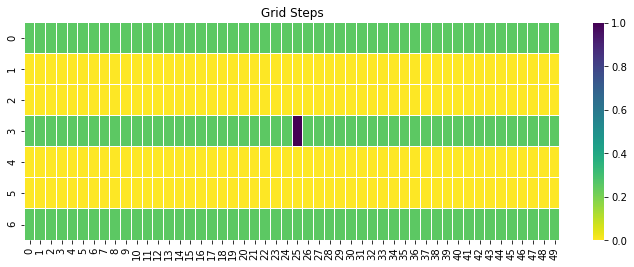

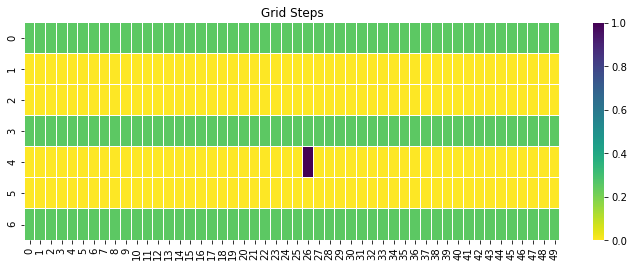

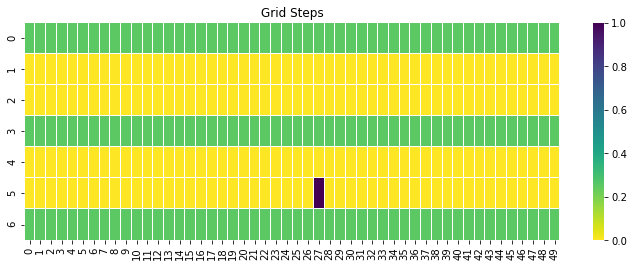

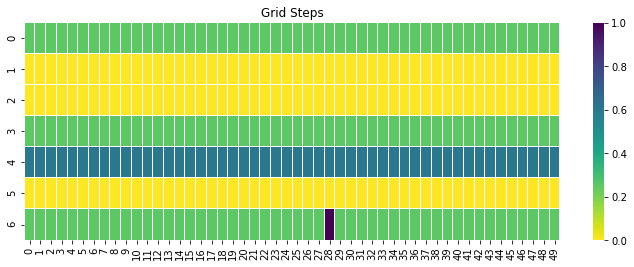

In [303]:
hit = False
fin = False
while hit != True and fin != True:
    g, hit, fin = model_step(grid, sideways)

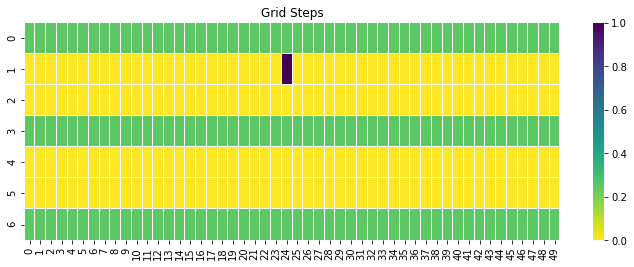

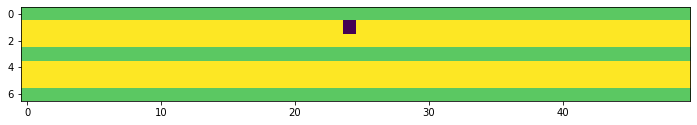

In [347]:
g, hit, fin = model_step(grid, sideways)

fig, ax = plt.subplots()
fig.set_size_inches(12,4)
ax.imshow(g, cmap="viridis_r", vmin=0, vmax=1)



In [304]:
%%capture
from matplotlib.animation import FuncAnimation, PillowWriter  
%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"

fig, ax = plt.subplots()




fig, ax = plt.subplots()  
x, ysin, ycos = [], [], []  
ln1, = plt.plot([], [], 'ro')  
ln2, = plt.plot([], [], 'm*')  

def init():  
    ax.set_xlim(0, 2*np.pi)  
    ax.set_ylim(-1, 1)

def update(i):  
    x.append(i)  
    ysin.append(np.sin(i))  
    ycos.append(np.cos(i))  
    ln1.set_data(x, ysin)  
    ln2.set_data(x, ycos)  
    
ani = FuncAnimation(fig, model_step(grid,sideways))  
plt.show()

from IPython.display import HTML
aniJS = HTML(ani.to_jshtml())


TypeError: 'tuple' object is not callable

In [348]:
%%capture
from matplotlib.animation import FuncAnimation, PillowWriter  
%matplotlib inline
plt.rcParams["animation.html"] = "jshtml"

fig, ax = plt.subplots()  
x, ysin, ycos = [], [], []  
ln1, = plt.plot([], [], 'ro')  
ln2, = plt.plot([], [], 'm*')  

def init():  
    ax.set_xlim(0, 2*np.pi)  
    ax.set_ylim(-1, 1)

def update(i):  
    x.append(i)  
    ysin.append(np.sin(i))  
    ycos.append(np.cos(i))  
    ln1.set_data(x, ysin)  
    ln2.set_data(x, ycos)  
    
ani = FuncAnimation(fig, update, np.linspace(0, 2*np.pi, 64), init_func=init)  
plt.show()

from IPython.display import HTML
aniJS = HTML(ani.to_jshtml())


In [349]:
aniJS

## _B_
- t=1=constant
- new direction = old direction +$\alpha$ with $\alpha$ is uniformly distributed in $[-2/3\pi; +2/3\pi]$

## C
-  t is exponentially distributed with intensity 1/time unit
- new direction = old direction +$\alpha$ with $\alpha$ is uniformly distributed in $[-2/3\pi; +2/3\pi]$